Exploring the UK's milk trade

by Kavitha.S, 22 January 2019.
The global trade data is taken from the United Nation's comtrade database.

In particular UK's import and exprts of milk and cream for the year 2015 is analysed.

The project paves way for the following questions.

How much does the UK export and import and is the balance positive (more exports than imports)? 
Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
Which are the regular customers, i.e. which countries buy milk from the UK every month?
Which countries does the UK both import from and export to?

In [2]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

from pandas import *
%matplotlib inline

Data Source:

To specifically obtain data for UK 's milk trade the following inputs are given:

Type of Product: goods
Frequency: monthly 
Periods: January to May of 2015
Reporter: United Kingdom
Partners: all
Flows: imports and exports
HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)
As per the website ,the data exceeds 500 rows. Data was downloaded using the Download CSV button and the download file renamed as 'comtrade_milk_uk_jan_jul_15.csv'

In [3]:
LOCATION ='comtrade_milk_uk_jan_jul_15.csv'

commodity code  has to be read as zero not to lose the leading zero.

In [4]:
milkDF= read_csv(LOCATION,dtype={'Commodity Code' :str})
milkDF.tail(2)
milkDF.columns
milkDF['Commodity Code']

0      0401
1      0401
2      0401
3      0401
4      0401
5      0401
6      0401
7      0401
8      0401
9      0401
10     0401
11     0401
12     0401
13     0401
14     0401
15     0401
16     0401
17     0401
18     0401
19     0401
20     0401
21     0401
22     0401
23     0401
24     0401
25     0401
26     0401
27     0401
28     0401
29     0401
       ... 
607    0402
608    0402
609    0402
610    0402
611    0402
612    0402
613    0402
614    0402
615    0402
616    0402
617    0402
618    0402
619    0402
620    0402
621    0402
622    0402
623    0402
624    0402
625    0402
626    0402
627    0402
628    0402
629    0402
630    0402
631    0402
632    0402
633    0402
634    0402
635    0402
636    0402
Name: Commodity Code, Length: 637, dtype: object

In [5]:
def milkType(code):
    if code =='0401':
         return "unprocessed"
    if code =='0402':
         return "processed"
    return "UnKnown"

# COMMODITY ='Milk and Cream'
# milkDF['COMMODITY'] = milkDF['Commodity Code'].apply(milkType)
# milkDF.columns
# MONTH ='Period'
# PARTNER ='Partner'
# FLOW ='Trade Flow'
# VALUE='Trade Value (US$)'
# headings =[MONTH,PARTNER,FLOW,'Commodity Code',VALUE ]

# milkDF=milkDF[headings]
# milkDF.head()
COMMODITY = 'Milk and cream'
milkDF[COMMODITY] = milkDF['Commodity Code'].apply(milkType)
milkDF[COMMODITY]
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
# COMMODITY='COMMODITY1'
headings = [MONTH, PARTNER,COMMODITY, FLOW, VALUE]
milkDF_Short = milkDF[headings]
milkDF_Short

# milkDF_Short.columns

,Period,Partner,Milk and cream,Trade Flow,Trade Value (US$)
0,201501,World,unprocessed,Imports,14104602
1,201501,World,unprocessed,Exports,26259792
2,201501,Australia,unprocessed,Exports,50331
3,201501,Austria,unprocessed,Exports,360
4,201501,Belgium,unprocessed,Imports,1424271
5,201501,Belgium,unprocessed,Exports,996031
6,201501,Bulgaria,unprocessed,Exports,191
7,201501,Canada,unprocessed,Exports,50193
8,201501,Sri Lanka,unprocessed,Exports,3089
9,201501,China,unprocessed,Exports,1022524


filtering the data pertaining to rows containing per country trade.

In [6]:
milk_countries = milkDF_Short[milkDF_Short[PARTNER]!='World']
milk_countries

,Period,Partner,Milk and cream,Trade Flow,Trade Value (US$)
2,201501,Australia,unprocessed,Exports,50331
3,201501,Austria,unprocessed,Exports,360
4,201501,Belgium,unprocessed,Imports,1424271
5,201501,Belgium,unprocessed,Exports,996031
6,201501,Bulgaria,unprocessed,Exports,191
7,201501,Canada,unprocessed,Exports,50193
8,201501,Sri Lanka,unprocessed,Exports,3089
9,201501,China,unprocessed,Exports,1022524
10,201501,Cyprus,unprocessed,Exports,4029
11,201501,Denmark,unprocessed,Imports,2546959


Analysing the first question:
'how much does the UK export and import and is the balance positive (i.e more 
exports than imports).
The dataframe is split into two groups:
    1.exports from the UK and
    2.imports into the UK. 
The trade values within each group are summed up to get the total trading.

In [7]:
# total trade flow
groupedTF = milk_countries.groupby([FLOW])
groupedTF[VALUE].aggregate(sum)


Trade Flow
Exports    265029661
Imports    156483978
Name: Trade Value (US$), dtype: int64

Export is greater than import. trade balance is positive.

To address the second question
'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?'
The dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [8]:
# combined imports and exports.
groupedPar = milk_countries.groupby([PARTNER,FLOW]) 
groupedPar[VALUE].aggregate(sum).sort_values(inplace =False,ascending=False)

Partner                  Trade Flow
Ireland                  Exports       128155891
                         Imports        46263897
France                   Imports        28314091
Germany                  Imports        21899123
Netherlands              Exports        18018603
                         Imports        17658912
Belgium                  Imports        14325697
China                    Exports        14111163
Denmark                  Imports        13681759
Germany                  Exports        10828464
China, Hong Kong SAR     Exports         9482458
France                   Exports         9381762
Algeria                  Exports         8087885
Belgium                  Exports         7209121
Côte d'Ivoire            Exports         5743708
Cuba                     Exports         5641107
Lebanon                  Exports         5233685
Poland                   Imports         4933917
Spain                    Imports         4910615
Guinea                   Exports 

In [12]:
# only for imports:
imports = milk_countries[milk_countries[FLOW]=='Imports']
impParDF = imports.groupby([PARTNER])

print ("The U.K imports from :",len(impParDF),"countries")
print("The countries are")
imp_countries=impParDF[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
imp_countries


The U.K imports from : 21 countries
The countries are


Partner
Ireland                     46263897
France                      28314091
Germany                     21899123
Netherlands                 17658912
Belgium                     14325697
Denmark                     13681759
Poland                       4933917
Spain                        4910615
Sweden                       1962413
Romania                       975996
Czech Rep.                    486889
Italy                         321635
Lithuania                     318407
Portugal                      308654
United States of America       46044
Slovakia                       39990
United Arab Emirates           27225
Hungary                         4762
United Kingdom                  2302
Latvia                           870
Austria                          780
Name: Trade Value (US$), dtype: int64

In [13]:
# only for exports:
exports = milk_countries[milk_countries[FLOW]=='Exports']
expParDF = exports.groupby([PARTNER])

print ("The U.K exports from :",len(expParDF),"countries")
print("The countries are")
exp_countries=expParDF[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
exp_countries


The U.K exports from : 107 countries
The countries are


Partner
Ireland                    128155891
Netherlands                 18018603
China                       14111163
Germany                     10828464
China, Hong Kong SAR         9482458
France                       9381762
Algeria                      8087885
Belgium                      7209121
Côte d'Ivoire                5743708
Cuba                         5641107
Lebanon                      5233685
Guinea                       4702978
Senegal                      2521663
Yemen                        2447846
Angola                       2416129
Congo                        2164983
Libya                        1946208
Dominican Rep.               1658017
Saudi Arabia                 1595605
United Arab Emirates         1590593
Cameroon                     1549766
Mauritius                    1246734
Spain                        1229172
Burkina Faso                 1151453
Mali                         1089756
Philippines                   880268
Gabon                         

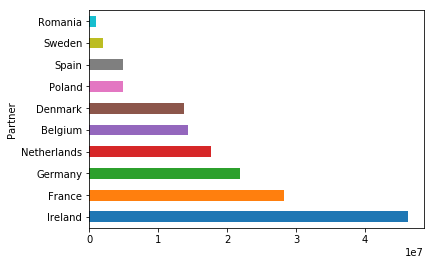

In [14]:
imp_countries.head(10).plot(kind='barh')


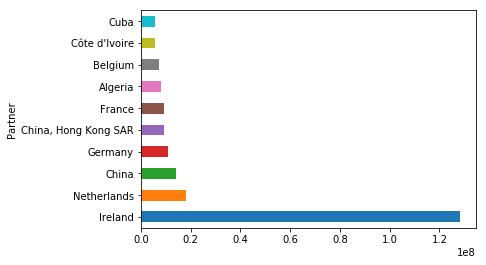

In [15]:
exp_countries.head(10).plot(kind='barh')

 The third question, 'Which are the regular customers, i.e. which countries buy milk from the UK every month?'
 We need to find the regular customer which imports milk from U.K every month.
 A regular customer imports both commodities every month. 
 This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [28]:
def buysEveryMonth(group):
    return len(group)==10

exportCountry =exports.groupby(PARTNER)
regular = exportCountry.filter(buysEveryMonth)
regular[(regular[MONTH]==201501) &(regular[COMMODITY]=='processed')]
#  regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'processed')] 


,Period,Partner,Milk and cream,Trade Flow,Trade Value (US$)
268,201501,Belgium,processed,Exports,142610
271,201501,China,processed,Exports,1013141
275,201501,Cyprus,processed,Exports,6625
280,201501,Denmark,processed,Exports,107883
284,201501,France,processed,Exports,178262
287,201501,Germany,processed,Exports,2588380
292,201501,"China, Hong Kong SAR",processed,Exports,1110086
294,201501,Hungary,processed,Exports,2119
298,201501,Ireland,processed,Exports,4020981
300,201501,Italy,processed,Exports,23267


In [29]:
regular[VALUE].sum() / exports[VALUE].sum()

0.7583526396315317

75% of the U.K exports are to these countries.

Bi-directional trade
To address the fourth question, 'Which countries does the UK both import from 
and export to?', a pivot table is used to list the total export and import value 
for each country. 

In [31]:
milk_countries
countries = pivot_table(milk_countries,
                       index =[PARTNER],
                       columns =[FLOW],
                       values =VALUE,
                       aggfunc=sum)
countries


Trade Flow,Exports,Imports
Partner,,
Algeria,8087885.0,NaN
Angola,2416129.0,NaN
Antigua and Barbuda,22218.0,NaN
"Areas, nes",51205.0,NaN
Australia,81644.0,NaN
Austria,56279.0,780.0
Bangladesh,673515.0,NaN
Barbados,15924.0,NaN
Belgium,7209121.0,14325697.0


In [32]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,56279.0,780.0
Belgium,7209121.0,14325697.0
Czech Rep.,2590.0,486889.0
Denmark,335068.0,13681759.0
France,9381762.0,28314091.0
Germany,10828464.0,21899123.0
Hungary,71378.0,4762.0
Ireland,128155891.0,46263897.0
Italy,173689.0,321635.0


In [ ]:
Conclusions:

The U.K export and import trade of from January to May 2015 was analysed in terms
of which countries the UK mostly depends on for income (exports) and goods 
(imports). Over the period, the UK had a trade surplus of over 100 million US 
dollars.

Ireland is the main partner, but it imported from the UK almost the triple in 
value than it exported to the UK. 

The UK exported to over 100 countries during the period, but only imported 
from 21 countries, the main ones (top five by trade value) being 
geographically close. China and Hong Kong are the main importers.

The UK is heavily dependent on its regular customers, the 16 countries that buy 
all types of milk and cream every month. They contribute three quarters of the 
total export value.

The UK has bi-directional trade (i.e. both exports and imports) with 20 
countries, although for some the trade value (in US dollars) is suspiciously low,
which raises questions about data's accuracy.